In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

plt.rcParams['figure.figsize'] = [15,10]   #(to enhance the display size)

In [2]:
im = cv2.imread('D:\Machine Learning\ML Projects\Image Compression Using Kmeans\landscape.jpg')
(h, w, c) = im.shape    #height , weight, color
h, w, c

(902, 1443, 3)

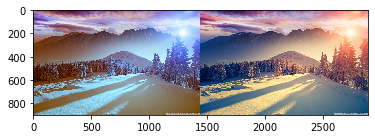

In [4]:
image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(np.hstack([im, image]))   # horizontally stacking the pictures

# Reshaping the Image

In [5]:
from sklearn.cluster import MiniBatchKMeans

In [6]:
image = image.reshape(h*w, 3)   #flattening the image in 2 dimension.. now a matrix of (h*w, 3) -> 2d

In [7]:
n_clusers = 16
km = MiniBatchKMeans(n_clusters = 16)
labels = km.fit_predict(image)

In [8]:
print(labels.shape)
labels[:1000:100]

(1301586,)


array([ 5,  1,  7,  7, 14, 11,  5, 13, 13,  5], dtype=int32)

In [9]:
quant = km.cluster_centers_.astype('uint8')[labels]  #har pixel ki rgb value mil rhi h
km.cluster_centers_.astype('uint8')

array([[247, 228, 209],
       [ 84, 100, 126],
       [178, 150, 176],
       [ 28,  59, 105],
       [209, 183, 138],
       [140, 124, 135],
       [213, 120, 106],
       [ 21,  30,  70],
       [171, 149, 134],
       [246, 214, 160],
       [ 53,  81, 118],
       [151,  93,  93],
       [214, 182, 189],
       [109, 120, 134],
       [100,  66,  81],
       [240, 163, 141]], dtype=uint8)

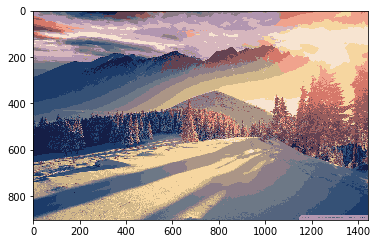

In [10]:
quant = quant.reshape((h,w,3))
plt.imshow(quant)

In [59]:
image = cv2.cvtColor(quant, cv2.COLOR_RGB2BGR)
cv2.imwrite('D:\Machine Learning\ML Projects\Image Compression Using Kmeans/compressed.jpg', image)

True